In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.pandas.set_option('display.max_columns', None)

In [8]:
train= pd.read_csv('titanic/train.csv')
test= pd.read_csv('titanic/test.csv')

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
train.shape,test.shape

((891, 12), (418, 11))

In [16]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<Axes: xlabel='Survived'>

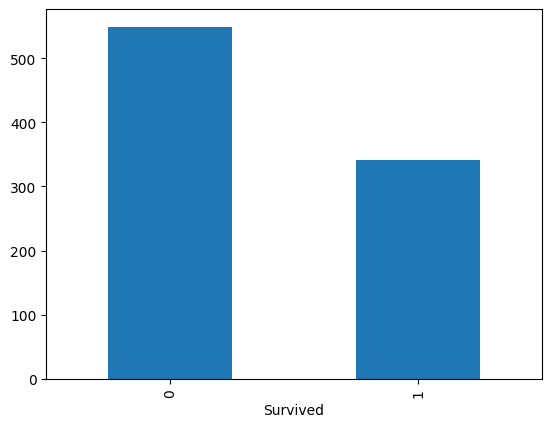

In [30]:
train.groupby('Survived').size().plot(kind= 'bar')

In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [39]:
#dropping the passenger id as it does not give any useful information
train.drop(columns=['PassengerId'], inplace=True)

In [42]:
numerical_columns= list(train.select_dtypes(include= ['int', 'float']).columns)
numerical_columns.remove('Survived')
numerical_columns

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [44]:
#checking for null values
train[numerical_columns].isna().sum()

Pclass      0
Age       177
SibSp       0
Parch       0
Fare        0
dtype: int64

<Axes: xlabel='Age', ylabel='Count'>

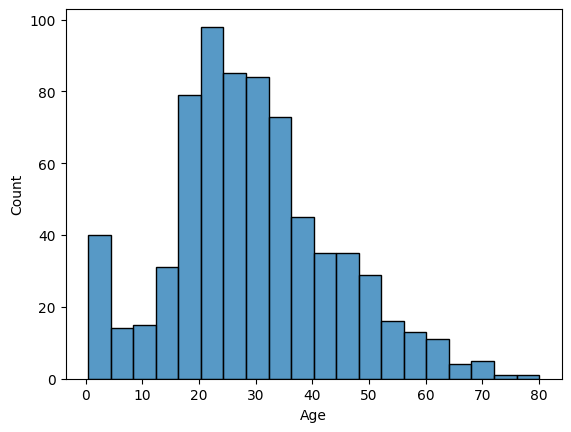

In [47]:
sns.histplot(train['Age'])

In [48]:
#null percentage calculation function

def null_percentage(col):
    return 1.0*col.isna().sum()/len(col)


train[numerical_columns].apply(lambda col: null_percentage(col))

Pclass    0.000000
Age       0.198653
SibSp     0.000000
Parch     0.000000
Fare      0.000000
dtype: float64

In [51]:
train['Age']= train['Age'].fillna(train.Age.median())

In [53]:
train[numerical_columns]

,Pclass,Age,SibSp,Parch,Fare
0,3,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,3,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,3,35.0,0,0,8.0500
...,...,...,...,...,...
886,2,27.0,0,0,13.0000
887,1,19.0,0,0,30.0000
888,3,28.0,1,2,23.4500
889,1,26.0,0,0,30.0000


In [62]:
#categorical values can be present as numerical values
#hence checking the distinct values in each numerical columns

for cols in numerical_columns:
    print(cols,len(train[cols].unique()))

Pclass 3
Age 88
SibSp 7
Parch 7
Fare 248


In [92]:
continuous_variable= [var for var in numerical_columns if len(train[var].unique())> 10]
continuous_variable
discrete_variable= [var for var in numerical_columns if len(train[var].unique())<= 10]
discrete_variable

['Pclass', 'SibSp', 'Parch']

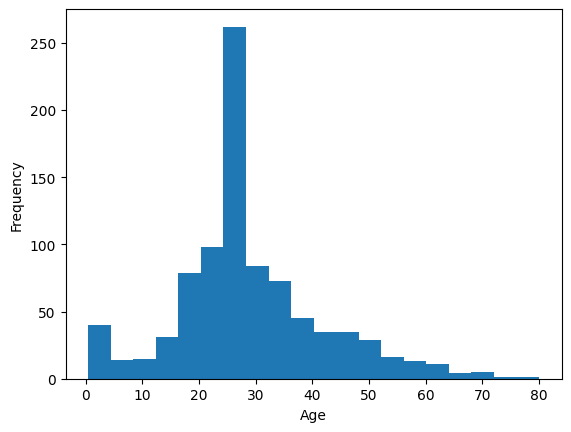

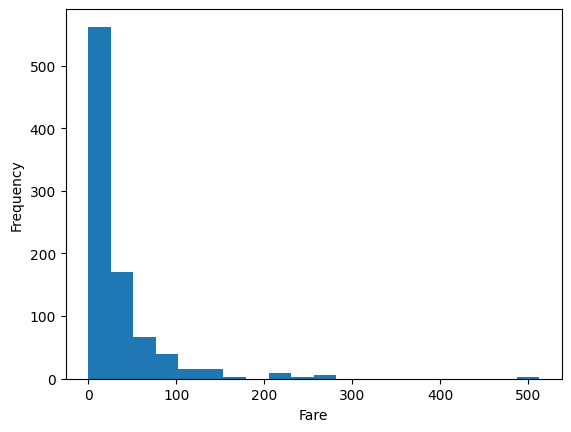

In [73]:
for var in continuous_variable:
    train[var].plot(kind='hist', bins=20)
    plt.xlabel(var)
    plt.show()

Age looks like normally distributed but fare is not. We will try tranforming Fare to  make it more gaussian.

In [78]:
train['Fare'].describe() #min value is 0. log can be applied.

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

Applying yeo johnson

In [79]:
from scipy.stats import yeojohnson\


In [83]:
tmp_train, param = yeojohnson(train['Fare'])

<Axes: ylabel='Frequency'>

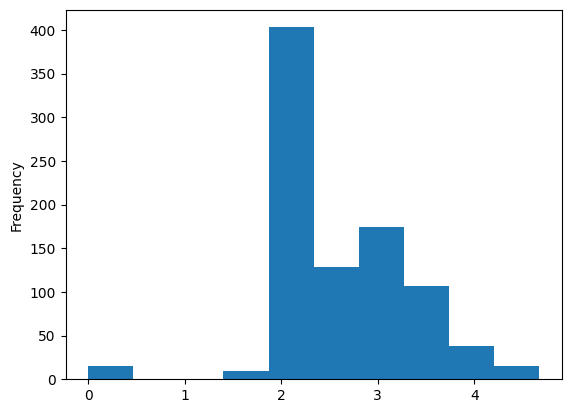

In [89]:
pd.Series(tmp_train).plot(kind= 'hist') #little better

In [90]:
train['Fare'], param = yeojohnson(train['Fare'])

In [93]:
# checking discrete columns

discrete_variable

['Pclass', 'SibSp', 'Parch']

In [100]:
train['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

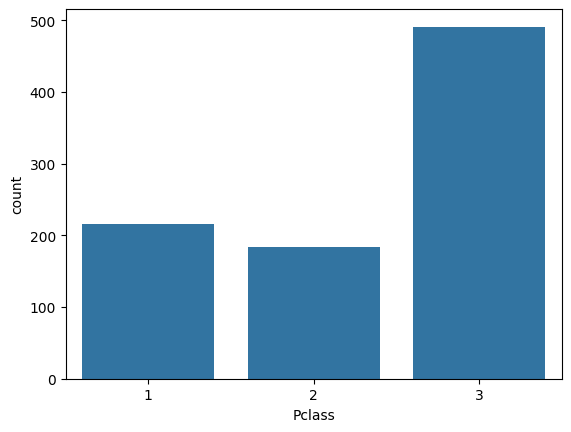

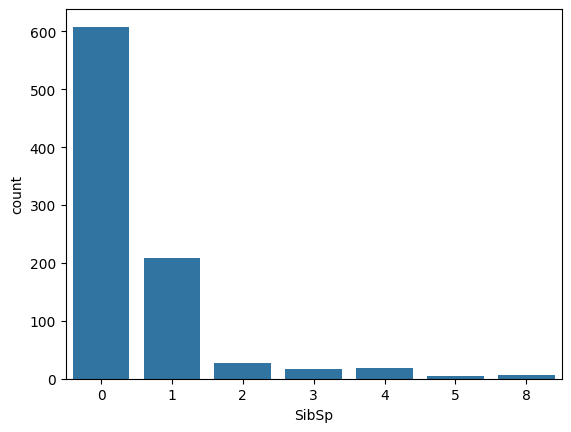

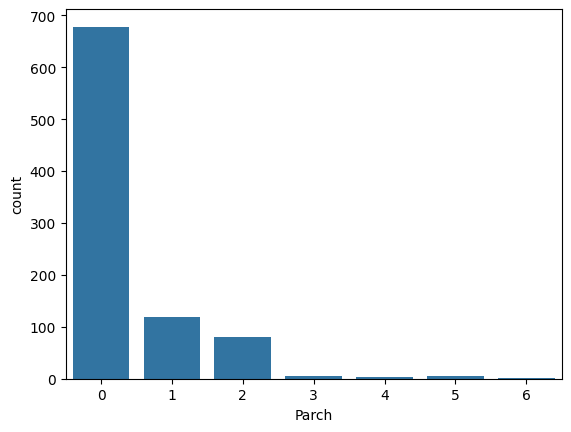

In [103]:
for var in discrete_variable:
    sns.barplot(train[var].value_counts())
    plt.show()

SibSp and Parch has many low frequency variables.

Lets perform operation to find out rare lables.

In [110]:
def label_percentage(col):
    return print(1.0*col.value_counts()/len(col))


In [114]:
train[discrete_variable].apply(lambda col: label_percentage(col))

Pclass
3    0.551066
1    0.242424
2    0.206510
Name: count, dtype: float64
SibSp
0    0.682379
1    0.234568
2    0.031425
4    0.020202
3    0.017957
8    0.007856
5    0.005612
Name: count, dtype: float64
Parch
0    0.760943
1    0.132435
2    0.089787
5    0.005612
3    0.005612
4    0.004489
6    0.001122
Name: count, dtype: float64


Pclass    None
SibSp     None
Parch     None
dtype: object

In [115]:
for var in discrete_variable:
    label_percentage(train[var])

Pclass
3    0.551066
1    0.242424
2    0.206510
Name: count, dtype: float64
SibSp
0    0.682379
1    0.234568
2    0.031425
4    0.020202
3    0.017957
8    0.007856
5    0.005612
Name: count, dtype: float64
Parch
0    0.760943
1    0.132435
2    0.089787
5    0.005612
3    0.005612
4    0.004489
6    0.001122
Name: count, dtype: float64


Method 1

In [123]:
def get_rare_label(df,col, threshold):
    df=df.copy()
    tmp = 1.0*df[col].value_counts()/len(df[col])
    return tmp[tmp< threshold]

In [124]:
for var in discrete_variable:
    print(get_rare_label(train,var,.01))

Series([], Name: count, dtype: float64)
SibSp
8    0.007856
5    0.005612
Name: count, dtype: float64
Parch
5    0.005612
3    0.005612
4    0.004489
6    0.001122
Name: count, dtype: float64


Method 2

In [127]:
def get_rare_label(col, threshold):

    tmp = 1.0*col.value_counts()/len(col)
    return print(tmp[tmp< threshold])

In [128]:
train[discrete_variable].apply(lambda col: get_rare_label(col,0.01))

Series([], Name: count, dtype: float64)
SibSp
8    0.007856
5    0.005612
Name: count, dtype: float64
Parch
5    0.005612
3    0.005612
4    0.004489
6    0.001122
Name: count, dtype: float64


Pclass    None
SibSp     None
Parch     None
dtype: object

We can choose to replace the rare labels with single label. But before that we need to understand the relaation of each variable with the target variable. This I don't know how to check.\

Replacement we can do using np.where function

For now lets analyse the non-numerical variables

In [132]:
string_variable= list(train.select_dtypes(include=['O']).columns)
#name and Ricket does not give any useful information, so we will remove it.
string_variable.remove('Name')
string_variable.remove('Ticket')
string_variable

['Sex', 'Cabin', 'Embarked']

In [139]:
1.0*train[string_variable].isna().sum()/(train.shape[0])

Sex         0.000000
Cabin       0.771044
Embarked    0.002245
dtype: float64

In [138]:
#cabin has 77% null values , we will have to drop cabin as well
#Embarked can be imputed with the mode 

11

In [144]:
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace= True)

In [147]:
# We will need to do one hot encoding for Sex and Embarked perhaps

Continuing with the udemy course for time being